In [30]:
import pandas as pd
import numpy as np

from sklearn import decomposition
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sb

# Задание 1

In [31]:
data_1 = np.array([
    np.array([4,   2.9]),
    np.array([2.5, 1  ]),
    np.array([3.5, 4  ]),
    np.array([2,   2.1])
])

kernel_function = lambda x1, x2: np.linalg.norm(x1 - x2)**2

kernel_matrix = [[kernel_function(x1, x2) for x2 in data_1] for x1 in data_1]
pd.DataFrame(kernel_matrix)

,0,1,2,3
0,0.00,5.86,1.46,4.64
1,5.86,0.00,10.00,1.46
2,1.46,10.00,0.00,5.86
3,4.64,1.46,5.86,0.00


# Задание 2

In [32]:
df = pd.DataFrame({
    "X1": [  8,  0,  10,  10, 2],
    "X2": [-20, -1, -19, -20, 0]
})

df

,X1,X2
0,8,-20
1,0,-1
2,10,-19
3,10,-20
4,2,0


## Subtask 1

In [33]:

mean = df.mean()
var = df.var()
pd.concat([mean, var], axis=1, keys=["mean", "var"]).T

,X1,X2
mean,6.0,-12.0
var,22.0,110.5


In [34]:
cov = df.cov()
cov

,X1,X2
X1,22.0,-47.5
X2,-47.5,110.5


## Subtask 2

In [35]:
vals, vecs = np.linalg.eig(cov.to_numpy())
idx = vals.argsort()[::-1]
vals = vals[idx]
vecs = vecs[:, idx]

print("eigenvals:", vals)
print("eigenvecs:", vecs)

eigenvals: [131.16773641   1.33226359]
eigenvecs: [[ 0.39897876 -0.91696017]
 [-0.91696017 -0.39897876]]


## Subtask 3

In [36]:
inner_size = len(df.columns)
inner_size

2

## Subtask 4

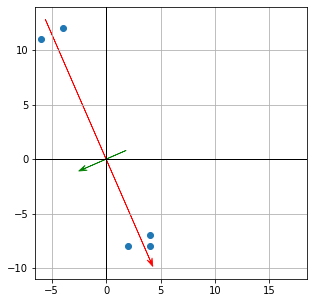

[[-8.13363886 12.4804344  -8.01463621 -8.93159638 12.59943705]
 [ 1.35790974  1.11299466 -0.87498936 -0.4760106  -1.11990443]]


In [37]:
def draw_arrow(xy1, xy2, color="k"):
    dx = xy2[0] - xy1[0]
    dy = xy2[1] - xy1[1]

    plt.arrow(xy1[0], xy1[1], dx, dy, color=color, linewidth=0.8, clip_on=False, head_width=0.5, overhang=0.5)



pca = decomposition.PCA(n_components=2)

mean = df.mean()
tf_df = pd.DataFrame()
tf_df["X1"] = df["X1"].transform(lambda x: x - mean["X1"])
tf_df["X2"] = df["X2"].transform(lambda x: x - mean["X2"])

plt.figure(figsize=[5, 5])
plt.grid(True, "both")
plt.axhline(y=0, color="k", linewidth="1")
plt.axvline(x=0, color="k", linewidth="1")

plt.scatter(tf_df["X1"], tf_df["X2"])
draw_arrow(-vecs[0] * 14, vecs[0] * 10, color="r")
draw_arrow(-vecs.T[1] * 2, vecs.T[1] * 2, color="g")
plt.axis("square")

plt.show()

pc = pca.fit_transform(tf_df).T
print(pc)

[  6. -12.]


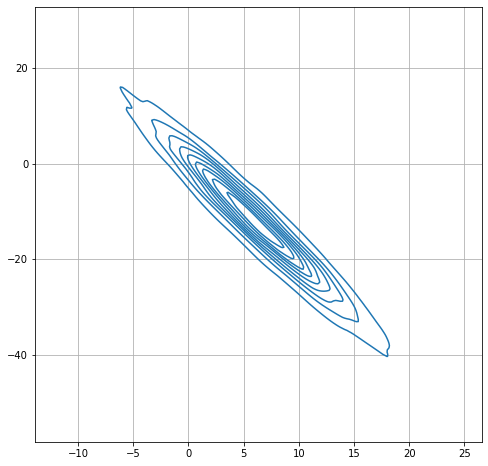

In [38]:
print(mean.to_numpy())

x, y = np.random.multivariate_normal(mean.to_numpy(), cov.T.to_numpy(), 10000).T

plt.figure(figsize=(8, 8))
plt.grid(True, "both")

ax = sb.kdeplot(x=x, y=y)
plt.show()

# Задание 3

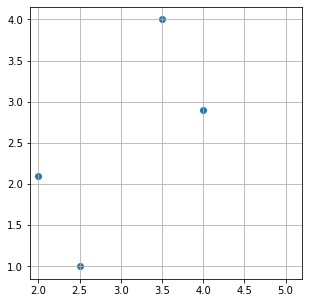

[[ 2.81529553e-08 -6.83573643e-09 -6.83573643e-09  2.81529553e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [43]:
data_frame_1 = pd.DataFrame(data_1)

plt.figure(figsize=(5,5))
plt.scatter(data_frame_1[0], data_frame_1[1])
plt.grid(True, "both")
plt.axis("square")
plt.show()

# calculated pca
# pca = decomposition.PCA(n_components=2)
# print(pca.fit_transform(data_frame_1).T)

# calculated via precomputed linear kernel
# linear_kernel = data_1.dot(data_1.T)
# kpca = decomposition.KernelPCA(n_components=1, kernel="precomputed")
# print(kpca.fit_transform(linear_kernel).T)

# calculated via precomputed kernel_function
kpca = decomposition.KernelPCA(n_components=2, kernel="precomputed")
print(kpca.fit_transform(kernel_matrix).T)